In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

GUARANTA DO NORTE(MT) 
GOIANIA(GO) 
PORTO ALEGRE DO NORTE(MT) 
BRASILIA(DF) 
QUERENCIA(MT) 
IJUI(RS) 
SANTANA DO ARAGUAIA(PA) 
RONDONOPOLIS(MT) 
SAO LUIS DE MONTES BELOS(GO) 
VILA RICA(MT) 
REDENCAO(PA) 
MINEIROS(GO) 
ITAITUBA(PA) 
SAO PAULO(SP) 
FORTALEZA(CE) 
 IMPERATRIZ(MA)
 ITAITUBA(PA)
 QUERENCIA(MT)
 VILA RICA(MT)
 PALMAS(TO)
 CANARANA(MT)
 BRASILIA(DF)
 CARAZINHO(RS)
 REDENCAO(PA)
 GOIANIA(GO)
 SAO PAULO(SP)
 PORTO VELHO(RO)
 SINOP(MT)
 SAO FELIX DO ARAGUAIA(MT)
 ARAGUAINA(TO)
 PONTE BRANCA(MT)
 ARAGARCAS(GO)
 IBIPITANGA(BA)
 NOVO PROGRESSO(PA)
 SANTA MARIA DA VITORIA(BA)


/tmp/ipykernel_161303/306738619.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'trips': total_trips}, ignore_index=True)
/tmp/ipykernel_161303/306738619.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'trips': total_trips}, ignore_index=True)
/tmp/ipykernel_161303/306738619.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'trips': total_trips}, ignore_index=True)
/tmp/ipykernel_161303/306738619.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_

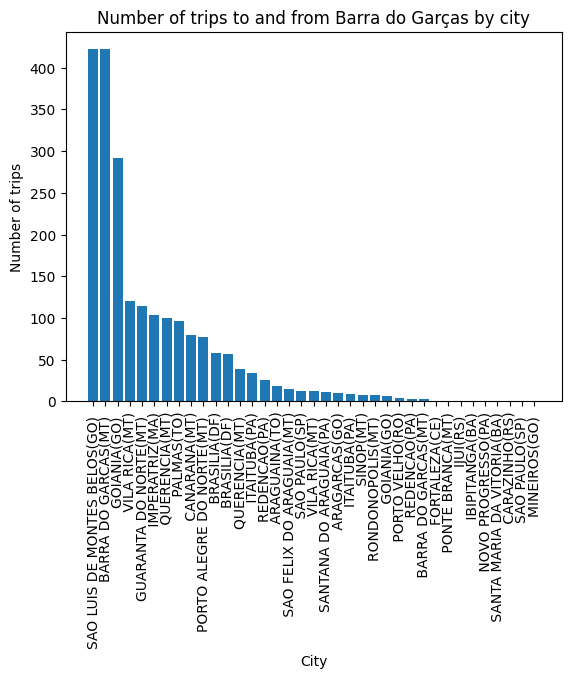

In [32]:
# create a new dataframe to count trips by city
trips_by_city = pd.DataFrame(columns=['city', 'trips'])
cities = pd.concat([df['municipio_origem'], df['municipio_destino']]).unique()

for city in cities:
    if 'BARRA DO GARCAS(MT)' not in city:
        print(city)
        # count trips to and from the city
        trips_to_city = len(df[(df['municipio_destino'] == city) & (df['sentido_linha'] == 0)])
        trips_from_city = len(df[(df['municipio_origem'] == city) & (df['sentido_linha'] == 1)])
        total_trips = trips_to_city + trips_from_city

    # add the city and trip count to the dataframe
    trips_by_city = trips_by_city.append({'city': city, 'trips': total_trips}, ignore_index=True)

# sort the dataframe by trip count
trips_by_city = trips_by_city.sort_values(by='trips', ascending=False)

# create a bar chart
plt.bar(trips_by_city['city'], trips_by_city['trips'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of trips')
plt.title('Number of trips to and from Barra do Garças by city')
plt.show()


In [37]:
barra_trips.head()

,index,cnpj,placa,nu_linha,data_inicio_viagem,data_fim_viagem,sentido_linha,latitude,longitude,municipio_origem,municipio_destino,hora_partida,direction
0,0,3143492000162,OAV4256,11006600,2022-01-01 12:16:02,2022-02-01 12:49:52,1,-15.884032,-52.276768,GUARANTA DO NORTE(MT),IMPERATRIZ(MA),12,to
1,1,3143492000162,OAQ2505,11006600,2022-01-01 12:18:32,2022-02-01 12:46:17,0,-15.884033,-52.276767,GUARANTA DO NORTE(MT),IMPERATRIZ(MA),12,from
2,2,3143492000162,OAP5155,12052361,2022-01-01 16:58:19,2022-02-01 12:45:20,0,-15.883967,-52.276747,GOIANIA(GO),ITAITUBA(PA),16,from
3,3,3143492000162,OAP4095,12049000,2022-01-01 17:00:44,2022-02-01 12:44:59,0,-15.884032,-52.276768,GOIANIA(GO),QUERENCIA(MT),17,from
4,4,3143492000162,OAP1545,12014200,2022-01-01 17:07:47,2022-02-01 12:45:00,1,-15.883993,-52.276757,GOIANIA(GO),VILA RICA(MT),17,to


In [39]:
grouped_data = barra_trips.groupby(['municipio_origem', 'direction']).size().reset_index(name='count')
grouped_data

,municipio_origem,direction,count
0,BARRA DO GARCAS(MT),from,21
1,BARRA DO GARCAS(MT),to,13
2,BRASILIA(DF),from,86
3,BRASILIA(DF),to,57
4,FORTALEZA(CE),to,1
5,GOIANIA(GO),from,349
6,GOIANIA(GO),to,292
7,GUARANTA DO NORTE(MT),from,104
8,GUARANTA DO NORTE(MT),to,114
9,IJUI(RS),from,3


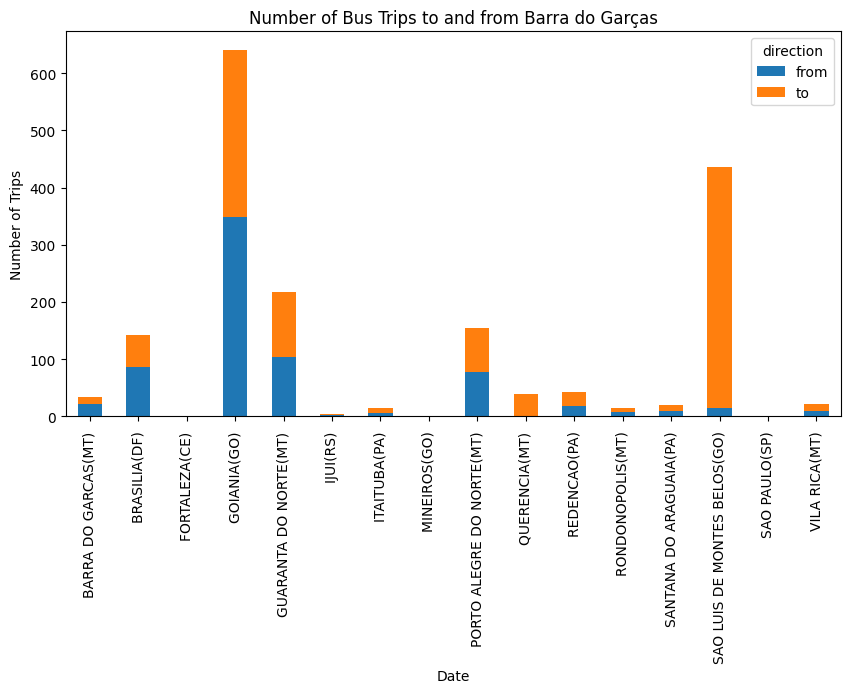

In [41]:
barra_trips = df
# Create a new column to indicate whether the trip is going to or from Barra do Garças
barra_trips['direction'] = ['to' if x == 1 else 'from' for x in df['sentido_linha']]

# Group the data by date and direction
grouped_data = barra_trips.groupby(['municipio_origem', 'direction']).size().reset_index(name='count')

# Pivot the data to have the direction as columns
pivoted_data = grouped_data.pivot(index='municipio_origem', columns='direction', values='count')

# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
pivoted_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Trips")
ax.set_title("Number of Bus Trips to and from Barra do Garças")

plt.show()

In [2]:
# Load data from each year's CSV file into a separate DataFrame
df_2019 = pd.read_csv('viagem_regular_2019.csv')
df_2020 = pd.read_csv('viagem_regular_2020.csv')
df_2021 = pd.read_csv('viagem_regular_2021.csv')
df_2022 = pd.read_csv('viagem_regular_2022.csv')

# Add a 'year' column to each DataFrame to identify the year of the data
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022

# Concatenate the separate DataFrames into a single DataFrame
df_all = pd.concat([df_2019, df_2020, df_2021, df_2022], ignore_index=True)

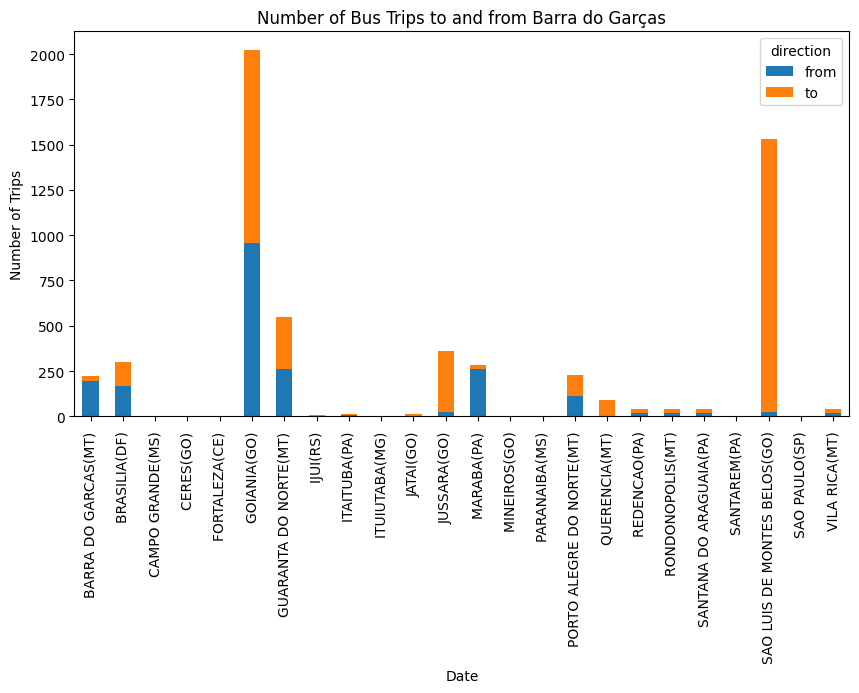

In [3]:
barra_trips = df_all
# Create a new column to indicate whether the trip is going to or from Barra do Garças
barra_trips['direction'] = ['to' if x == 1 else 'from' for x in df_all['sentido_linha']]

# Group the data by date and direction
grouped_data = barra_trips.groupby(['municipio_origem', 'direction']).size().reset_index(name='count')

# Pivot the data to have the direction as columns
pivoted_data = grouped_data.pivot(index='municipio_origem', columns='direction', values='count')

# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
pivoted_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Trips")
ax.set_title("Number of Bus Trips to and from Barra do Garças")

plt.show()

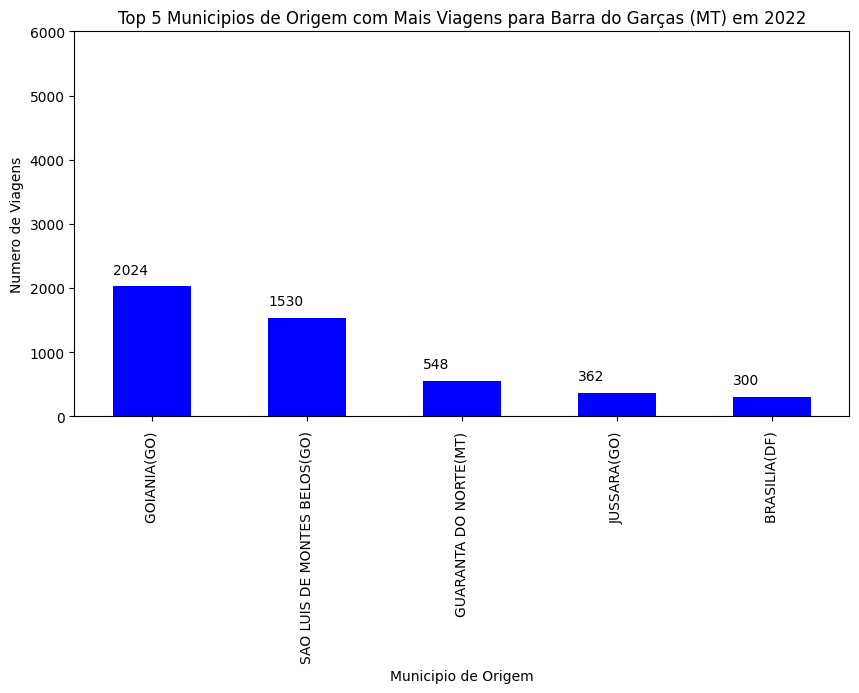

In [4]:
counts = barra_trips['municipio_origem'].value_counts().sort_values(ascending=False)


top_5 = counts[:5]
remaining = counts[5:]

# Plot top 5 municipios
plt.figure(figsize=(10,5))
top_5.plot(kind='bar', color='blue')
plt.title('Top 5 Municipios de Origem com Mais Viagens para Barra do Garças (MT) em 2022')
plt.xlabel('Municipio de Origem')
plt.ylabel('Numero de Viagens')
plt.ylim(top=6000) # adjust y-axis limit if necessary

# Add counts inside the bars
for i, v in enumerate(top_5.values):
    plt.text(i-0.25, v+200, str(v), color='black')

plt.show()

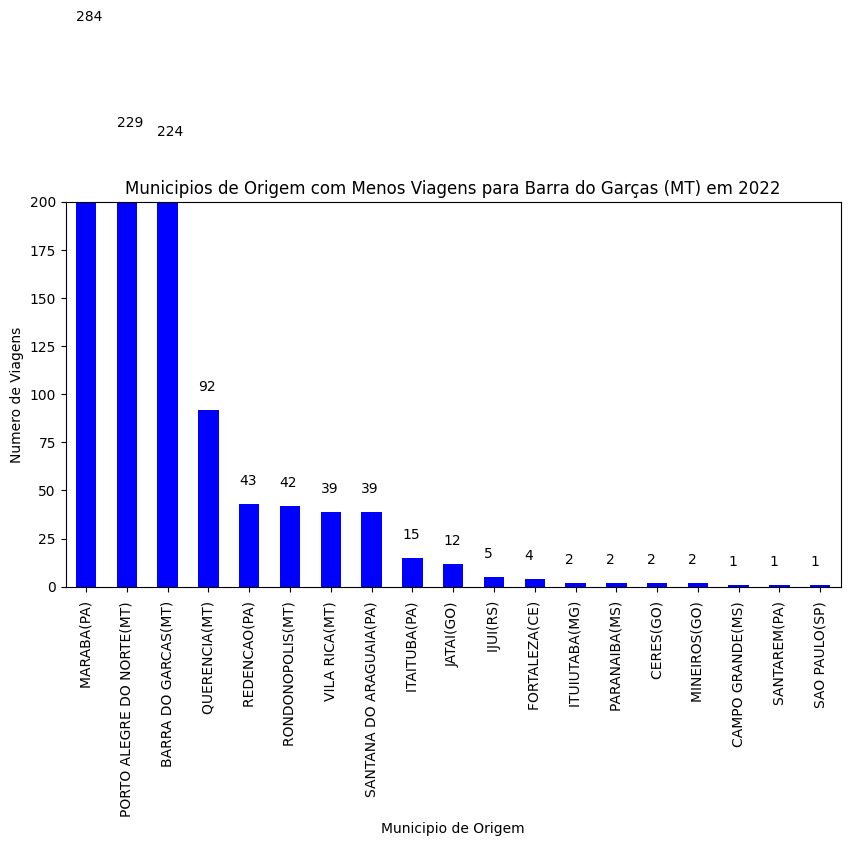

In [5]:
# Plot remaining municipios
plt.figure(figsize=(10,5))
remaining.plot(kind='bar', color='blue')
plt.title('Municipios de Origem com Menos Viagens para Barra do Garças (MT) em 2022')
plt.xlabel('Municipio de Origem')
plt.ylabel('Numero de Viagens')
plt.ylim(top=200) # adjust y-axis limit if necessary

# Add counts inside the bars
for i, v in enumerate(remaining.values):
    plt.text(i-0.25, v+10, str(v), color='black')

plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

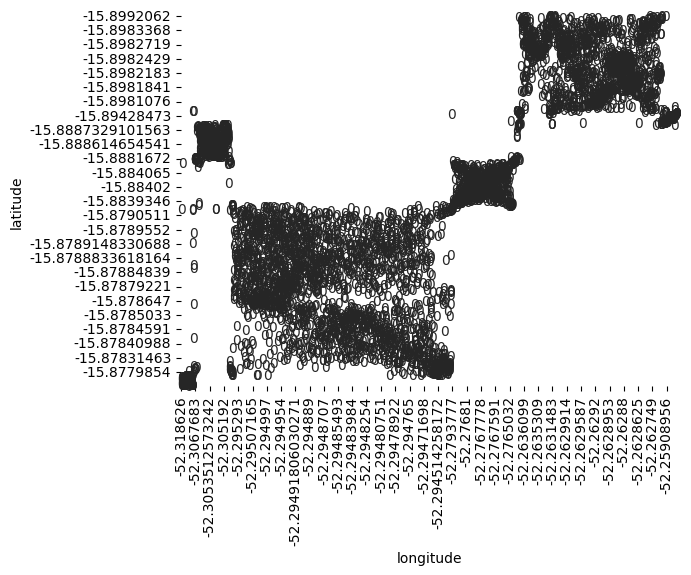

In [6]:
# Create a new column to indicate whether the bus stop is in Barra do Garças or not
df_all['is_bdg'] = df_all.apply(lambda row: 'Barra do Garças' in row['municipio_origem'] or 'Barra do Garças' in row['municipio_destino'], axis=1)

# Create a pivot table to count the number of bus stops in each longitude-latitude coordinate
table = df_all.pivot_table(values='is_bdg', index=['latitude'], columns=['longitude'], aggfunc='sum')

# Create a heatmap using seaborn
sns.heatmap(table, cmap='Blues', annot=True, fmt='.0f', cbar=False)

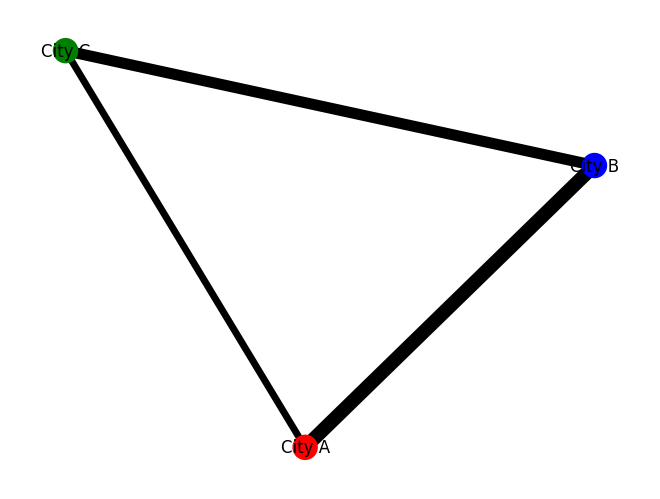

In [9]:
import networkx as nx

G = nx.Graph()

G.add_node('City A')
G.add_node('City B')
G.add_node('City C')

G.add_edge('City A', 'City B')
G.add_edge('City A', 'City C')
G.add_edge('City B', 'City C')

# set node attributes
G.nodes['City A']['color'] = 'red'
G.nodes['City B']['color'] = 'blue'
G.nodes['City C']['color'] = 'green'

# set edge attributes
G.edges[('City A', 'City B')]['weight'] = 10
G.edges[('City A', 'City C')]['weight'] = 5
G.edges[('City B', 'City C')]['weight'] = 8

# get node colors and edge weights
node_colors = [G.nodes[n]['color'] for n in G.nodes]
edge_weights = [G.edges[e]['weight'] for e in G.edges]

# draw the graph
nx.draw(G, node_color=node_colors, width=edge_weights, with_labels=True)
plt.show()


In [43]:
#import geopandas as gpd
# Load a map of Brazil with geopandas
brazil_map = gpd.read_file('BR_map/BR_Municipios_2022.shp')

brazil_map['lon_lat'] = brazil_map['geometry'].apply(lambda x: (x.centroid.x, x.centroid.y))

In [48]:
from unidecode import unidecode

def clean_city_name(city):
    city = city.split("(")[0].strip() # remove state acronym
    city = unidecode(city.lower()) # remove accents and convert to lowercase
    return city

In [49]:
# Clean city names in CSV
df_all['municipio_origem_clean'] = df_all['municipio_origem'].apply(clean_city_name)
df_all['municipio_destino_clean'] = df_all['municipio_destino'].apply(clean_city_name)

# Clean city names in brazil_map
brazil_map['NM_MUN_CLEAN'] = brazil_map['NM_MUN'].apply(clean_city_name)

In [129]:
for node_id, data in G.nodes(data=True):
    print(node_id, data, len(data))

 BARRA DO GARCAS(MT) {'pos': (-16.643550884377632, -49.27378452372326)} 1
BARRA DO GARCAS(MT)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
MARABA(PA)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
GOIANIA(GO)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
 SAO FELIX DO ARAGUAIA(MT) {'pos': (-16.643550884377632, -49.27378452372326)} 1
SANTANA DO ARAGUAIA(PA)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
 PORTO VELHO(RO) {'pos': (-16.643550884377632, -49.27378452372326)} 1
BRASILIA(DF)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
 SAO PAULO(SP) {'pos': (-16.643550884377632, -49.27378452372326)} 1
SAO LUIS DE MONTES BELOS(GO)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
PORTO ALEGRE DO NORTE(MT)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
ITUIUTABA(MG)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
 SINOP(MT) {'pos': (-16.643550884377632, -49.27378452372326)} 1
 VILA RICA(MT) {'pos': (-16.643550884377632, -49.27378452372326

In [132]:
# Extract the latitude and longitude of each municipality from the map
municipalities = pd.concat([df_all['municipio_origem_clean'], df_all['municipio_destino_clean']]).unique()
latitudes = []
longitudes = []
municipios_dic = {}
for m in municipalities:
    long = brazil_map[brazil_map['NM_MUN_CLEAN'] == m]['lon_lat'].values[0][0]
    longitudes.append(long)
    lat = brazil_map[brazil_map['NM_MUN_CLEAN'] == m]['lon_lat'].values[0][1]
    latitudes.append(lat)
    municipios_dic[m] = (long,lat)
#municipalities_df = pd.DataFrame({'NM_MUN': municipalities, 'latitude': latitudes, 'longitude': longitudes})

# Create a new dataframe for the edges
# Create a dictionary of edges and their counts
edges = {}
for index, row in df_all.iterrows():
    source = row['municipio_origem']
    target = row['municipio_destino']
    key = (source, target)
    if key not in edges:
        edges[key] = 1
    else:
        edges[key] += 1

# Create the graph with networkx
G = nx.DiGraph()

# Add nodes to the graph
nodes = {}
for i, row in df_all.iterrows():
    if row['sentido_linha'] == 0:
        node_id = row['municipio_origem']
        nodes[node_id] = (municipalities_df['latitude'][municipalities_df.NM_MUN.ne(node_id).idxmax()],municipalities_df['longitude'][municipalities_df.NM_MUN.ne(node_id).idxmax()])
    else:
        node_id = row['municipio_destino']
        nodes[node_id] = (municipalities_df['latitude'][municipalities_df.NM_MUN.ne(node_id).idxmax()],municipalities_df['longitude'][municipalities_df.NM_MUN.ne(node_id).idxmax()])
    G.add_node(node_id, pos=nodes[node_id])

# Add edges to the graph
for i, row in df_all.iterrows():
    if row['sentido_linha'] == 0 and (edges.get((row['municipio_origem'],row['municipio_destino'])) is not None):
        G.add_edge(row['municipio_origem'], row['municipio_destino'], weight=edges[(row['municipio_origem'],row['municipio_destino'])])
    elif row['sentido_linha'] == 1 and (edges.get((row['municipio_destino'],row['municipio_origem'])) is not None):
        G.add_edge(row['municipio_destino'], row['municipio_origem'], weight=edges[(row['municipio_destino'],row['municipio_origem'])])

# Draw the map
m = folium.Map(location=[-16.6777158, -49.2676304], zoom_start=5)

# Draw the edges on the map
for edge in edges:
    weight = edges[edge]
    folium.PolyLine(locations=[municipios_dic[clean_city_name(edge[0])], municipios_dic[clean_city_name(edge[1])]], weight=weight/10, color='blue', opacity=0.5).add_to(m)

# Draw the nodes on the map
for node_id, data in G.nodes(data=True):
    if len(data) > 0:
        folium.CircleMarker(location=data['pos'], radius=5, color='red', fill=True, fill_color='red', fill_opacity=0.7).add_to(m)

# Save the map to an HTML file
m.save('bus_routes2.html')

Text(0.5, 1.0, 'Traffic Flow of Buses Arriving and Leaving Barra do Garças')

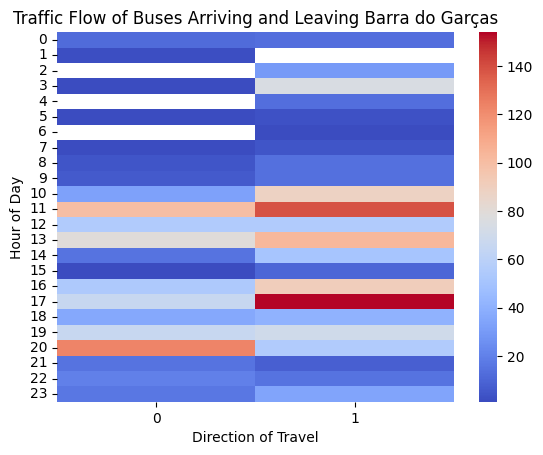

In [23]:
# Filter the data to include only buses arriving or leaving Barra do Garças
#df = df[(df['municipio_origem'] == 'BARRA DO GARCAS(MT)') | (df['municipio_destino'] == 'BARRA DO GARCAS(MT)')]

# Convert the date columns to datetime format
df['data_inicio_viagem'] = pd.to_datetime(df['data_inicio_viagem'])
df['data_fim_viagem'] = pd.to_datetime(df['data_fim_viagem'])

# Create a new column with the hour of the day for each trip start time
df['hora_partida'] = df['data_inicio_viagem'].dt.hour

# Create a pivot table with the number of trips for each hour of the day and direction of travel
pt = df.pivot_table(index='hora_partida', columns='sentido_linha', values='index', aggfunc='count')

# Create a heatmap of the pivot table
sns.heatmap(pt, cmap='coolwarm')

# Set the axis labels and title
plt.xlabel('Direction of Travel')
plt.ylabel('Hour of Day')
plt.title('Traffic Flow of Buses Arriving and Leaving Barra do Garças')
